In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
qdf = pd.read_csv("quic_cycles.csv")
qdf["total"] = qdf.sum(axis=1)
qdf.head()

,Identification of unencrypted headers,QUIC header protection removal,Deobfuscation of TLS Client Hello,SNI Extraction from TLS Client Hello,total
0,75707,276889,234061,22338,608995
1,51712,207991,207008,30696,497407
2,49937,204476,197531,21405,473349
3,50268,200404,193064,20987,464723
4,49137,203873,209388,23712,486110


In [20]:
tdf = pd.read_csv("tcp_cycles.csv")
tdf["total"] = tdf.sum(axis=1)
tdf.head()

,Identification of various headers till the start of TLS client hello,SNI Extraction from TLS Client Hello,total
0,41817,19412,61229
1,36671,13934,50605
2,32605,22883,55488
3,34905,19447,54352
4,33166,12157,45323


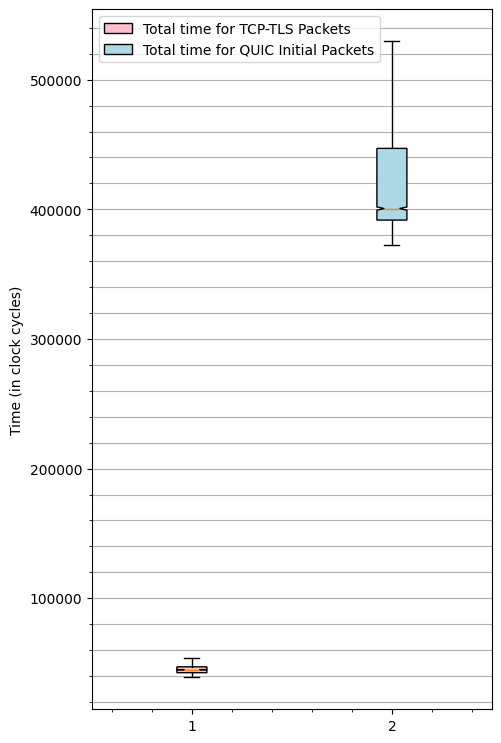

In [112]:
tcp_total = tdf["total"]
quic_total = qdf["total"]

data = [tcp_total, quic_total]
 
fig = plt.figure(figsize =(4, 7))
 
# Creating axes instance
colors = ['pink', 'lightblue']

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)
ax.grid(axis="y")
ax.grid(axis="y", which="minor")
ax.minorticks_on()
ax.set_ylabel("Time (in clock cycles)")
bp = ax.boxplot(data, patch_artist=True, notch=True,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Total time for TCP-TLS Packets", "Total time for QUIC Initial Packets"]
ax.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="upper left")

plt.savefig('total.pdf',bbox_inches='tight', dpi=150)
plt.show()

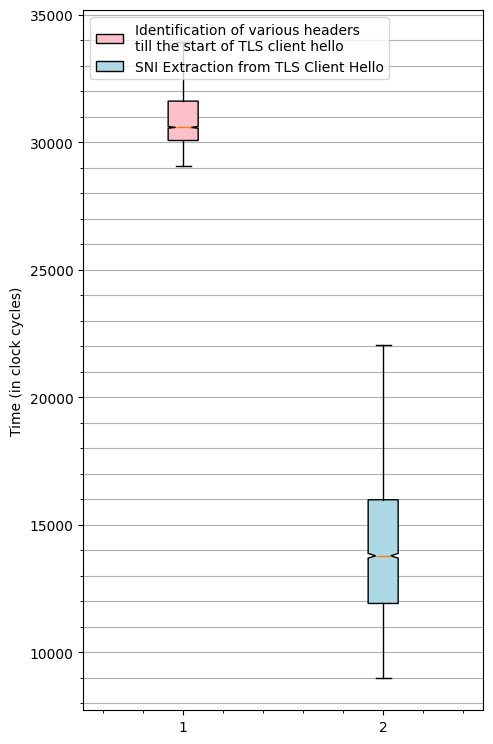

In [113]:
tcp_identify = tdf["Identification of various headers till the start of TLS client hello"]
tcp_sni = tdf["SNI Extraction from TLS Client Hello"]

# quic_total = qdf["total"]

data = [tcp_identify, tcp_sni]
 
fig = plt.figure(figsize =(4, 7))
 
# Creating axes instance
colors = ['pink', 'lightblue']

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)
ax.grid(axis="y")
ax.grid(axis="y", which="minor")
ax.minorticks_on()
ax.set_ylabel("Time (in clock cycles)")
bp = ax.boxplot(data, patch_artist=True, notch=True,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
label = ["Identification of various headers \ntill the start of TLS client hello", "SNI Extraction from TLS Client Hello"]

ax.legend([bp["boxes"][0], bp["boxes"][1]], label, loc="upper left")
plt.savefig('tcp.pdf',bbox_inches='tight', dpi=150)
plt.show()

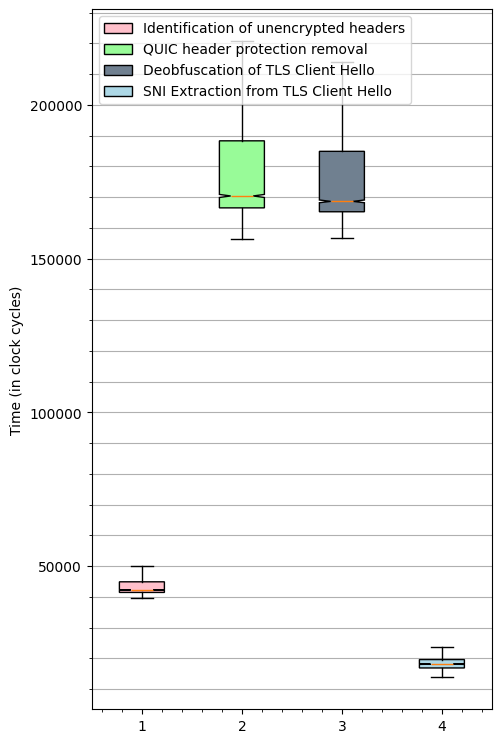

In [114]:
data = qdf.drop(["total"], axis=1)

fig = plt.figure(figsize =(4, 7))
 
# Creating axes instance
colors = ['pink',"palegreen", "slategrey", "lightblue"]

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)
ax.grid(axis="y")
ax.grid(axis="y", which="minor")
ax.minorticks_on()
ax.set_ylabel("Time (in clock cycles)")
bp = ax.boxplot(data, patch_artist=True, notch=True,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
label = [
        "Identification of unencrypted headers",
        "QUIC header protection removal",
        "Deobfuscation of TLS Client Hello",
        "SNI Extraction from TLS Client Hello"
]
ax.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2], bp["boxes"][3]], label, loc="upper left")
plt.savefig('quic.pdf',bbox_inches='tight', dpi=150)
plt.show()